# <center> Healthcare Provider Fraud
---
---

## Project Objectives
Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.

Problem Statement
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

Introduction to the Dataset
For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets s see their details :

- **A) Inpatient Data** : This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

    - **AdmissionDt**: It contains the date on which the patient was admitted into the hospital in yyyy-mm-dd format.

    - **DischargeDt**: It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format.

    - **DiagnosisGroupCode**: It contains a group code for the diagnosis done on the patient.



- **B) Outpatient Data** : This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

    - **BeneID**: It contains the unique id of each beneficiary i.e patients.

    - **ClaimID**: It contains the unique id of the claim submitted by the provider.

    - **ClaimStartDt**: It contains the date when the claim started in yyyy-mm-dd format.

    - **ClaimEndDt**: It contains the date when the claim ended in yyyy-mm-dd format.

    - **Provider**: It contains the unique id of the provider.

    - **InscClaimAmtReimbursed**: It contains the amount reimbursed for that particular claim.

    - **AttendingPhysician**: It contains the id of the Physician who attended the patient.

    - **OperatingPhysician**: It contains the id of the Physician who operated on the patient.

    - **OtherPhysician**: It contains the id of the Physician other than AttendingPhysician and OperatingPhysician who treated the patient.

    - **ClmDiagnosisCode**: It contains codes of the diagnosis performed by the provider on the patient for that claim.

    - **ClmProcedureCode**: It contains the codes of the procedures of the patient for treatment for that particular claim.

    - **DeductibleAmtPaid**: It consists of the amount by the patient. That is equal to Total_claim_amount — Reimbursed_amount.

- **C) Beneficiary Details Data** :his data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

    - **BeneID**: It contains the unique id of the beneficiary.

    - **DOB**: It contains the Date of Birth of the beneficiary.

    - **DOD**: It contains the Date of Death of the beneficiary if the beneficiary id deal else null.

    - **Gender, Race, State, Country**: It contains the Gender, Race, State, Country of the beneficiary.

    - **RenalDiseaseIndicator**: It contains if the patient has existing kidney disease.

    - **ChronicCond_**: The columns started with “ChronicCond_” indicates if the patient has existing that particular disease. Which also indicates the risk score of that patient.

    - **IPAnnualReimbursementAmt**: It consists of the maximum reimbursement amount for hospitalization annually.

    - **IPAnnualDeductibleAmt**: It consists of a premium paid by the patient for hospitalization annually.

    - **OPAnnualReimbursementAmt**: It consists of the maximum reimbursement amount for outpatient visits annually.

    - **OPAnnualDeductibleAmt**: It consists of a premium paid by the patient for outpatient visits annually.
    
---
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler


## Load Dataset

In [2]:
#Load train dataset
train = pd.read_csv('Train-1542865627584.csv')
train_Benedata = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_Ipdata = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_Opdata = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [3]:
#Load test dataset
test = pd.read_csv('Test-1542969243754.csv')
test_Benedata = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
test_Ipdata = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
test_Opdata = pd.read_csv('Test_Outpatientdata-1542969243754.csv')

### Train Dataset View

In [4]:
print('Train data shape :', train.shape)
print('Train columns :', train.columns)
print()
print('Train_Beneficiarydata data shape :', train_Benedata.shape)
print('Train_Beneficiarydata columns :', train_Benedata.columns)
print()
print('Train_Inpatientdata data shape :', train_Ipdata.shape)
print('Train_Inpatientdata columns :', train_Ipdata.columns)
print()
print('Train_Outpatientdata data shape :', train_Opdata.shape)
print('Train_Outpatientdata columns :', train_Opdata.columns)

Train data shape : (5410, 2)
Train columns : Index(['Provider', 'PotentialFraud'], dtype='object')

Train_Beneficiarydata data shape : (138556, 25)
Train_Beneficiarydata columns : Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

Train_Inpatientdata data shape : (40474, 30)
Train_Inpatientdata columns : Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPh

### Test Dataset View

In [5]:
print('Test data shape :', test.shape)
print('Test columns :', test.columns)
print()
print('Test_Beneficiarydata data shape :', test_Benedata.shape)
print('Test_Beneficiarydata columns :', test_Benedata.columns)
print()
print('Test_Inpatientdata data shape :', test_Ipdata.shape)
print('Test_Inpatientdata columns :', test_Ipdata.columns)
print()
print('Test_Outpatientdata data shape :', test_Opdata.shape)
print('Test_Outpatientdata columns :', test_Opdata.columns)

Test data shape : (1353, 1)
Test columns : Index(['Provider'], dtype='object')

Test_Beneficiarydata data shape : (63968, 25)
Test_Beneficiarydata columns : Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

Test_Inpatientdata data shape : (9551, 30)
Test_Inpatientdata columns : Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysic

### Combining Dataset

In [6]:
#train_outpatient columns list
list_train_col = train_Opdata.columns.to_list()

# Combine Train_Outpatientdata with train_Inpatientdata
train_Allpatient = pd.merge(train_Opdata,train_Ipdata,
                            left_on=list_train_col, right_on=list_train_col, how='outer')

train_Allpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [7]:
#test_outpatient columns list
list_test_col = test_Opdata.columns.to_list()

test_Allpatient = pd.merge(test_Opdata,test_Ipdata,
                            left_on=list_test_col, right_on=list_test_col, how='outer')

test_Allpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [8]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
train_AllDetails=pd.merge(train_Allpatient,train_Benedata,left_on='BeneID',right_on='BeneID',how='inner')

test_AllDetails=pd.merge(test_Allpatient,test_Benedata,left_on='BeneID',right_on='BeneID',how='inner')

In [9]:
train_AllDetails.shape

(558211, 54)

In [10]:
test_AllDetails.shape

(135392, 54)

In [11]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

train_fulldata=pd.merge(train,train_AllDetails,on='Provider')

test_fulldata=pd.merge(test,test_AllDetails,on='Provider')

In [12]:
train_fulldata.shape

(558211, 55)

In [13]:
test_fulldata.shape

(135392, 54)

In [14]:
train_fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   PotentialFraud                   558211 non-null  object 
 2   BeneID                           558211 non-null  object 
 3   ClaimID                          558211 non-null  object 
 4   ClaimStartDt                     558211 non-null  object 
 5   ClaimEndDt                       558211 non-null  object 
 6   InscClaimAmtReimbursed           558211 non-null  int64  
 7   AttendingPhysician               556703 non-null  object 
 8   OperatingPhysician               114447 non-null  object 
 9   OtherPhysician                   199736 non-null  object 
 10  ClmDiagnosisCode_1               547758 non-null  object 
 11  ClmDiagnosisCode_2               362605 non-null  object 
 12  Cl

In [15]:
#Creat Age column for train dataset
train_fulldata['DOB'] = pd.to_datetime(train_fulldata['DOB'], format='%Y-%m-%d')
train_fulldata['DOD'] = pd.to_datetime(train_fulldata['DOD'], format='%Y-%m-%d')
train_fulldata['Age'] = round((train_fulldata['DOD'] - train_fulldata['DOB']).dt.days/365)

#Creat Age column for test dataset
test_fulldata['DOB'] = pd.to_datetime(test_fulldata['DOB'], format='%Y-%m-%d')
test_fulldata['DOD'] = pd.to_datetime(test_fulldata['DOD'], format='%Y-%m-%d')
test_fulldata['Age'] = round((test_fulldata['DOD'] - test_fulldata['DOB']).dt.days/365)

In [16]:
train_fulldata.head(3)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,1,1,2,2,2,0,0,300,110,NaN
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,1,1,1,2,1,0,0,720,10,NaN
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,1,1,2,1,2,0,0,1380,370,NaN


In [17]:
test_fulldata.head(3)

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,1,2,2,2,2,0,0,1310,590,NaN
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,1,2,2,2,22000,3204,1020,910,NaN
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,V4581,...,1,1,2,2,2,22000,3204,1020,910,NaN


In [18]:
# Calculate age for last DOD value is 2009-12-01.
train_fulldata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_fulldata['DOB']).dt.days)/365),
                                 inplace=True)


test_fulldata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - test_fulldata['DOB']).dt.days)/365),
                                 inplace=True)

In [19]:
# Creat admitted days, add 1 to the difference of Discharge Date and Admission Date 

##Train
train_fulldata['AdmissionDt'] = pd.to_datetime(train_fulldata['AdmissionDt'] , format = '%Y-%m-%d')
train_fulldata['DischargeDt'] = pd.to_datetime(train_fulldata['DischargeDt'],format = '%Y-%m-%d')
train_fulldata['AdmitForDays'] = ((train_fulldata['DischargeDt'] - train_fulldata['AdmissionDt']).dt.days)+1

##Test
test_fulldata['AdmissionDt'] = pd.to_datetime(test_fulldata['AdmissionDt'] , format = '%Y-%m-%d')
test_fulldata['DischargeDt'] = pd.to_datetime(test_fulldata['DischargeDt'],format = '%Y-%m-%d')
test_fulldata['AdmitForDays'] = ((test_fulldata['DischargeDt'] - test_fulldata['AdmissionDt']).dt.days)+1

In [20]:
#Replacing 2 with 0 for chronic conditions, we get chronic condition with No = 0 and Yes = 1

##Train
train_fulldata = train_fulldata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

train_fulldata = train_fulldata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

##Test
test_fulldata = test_fulldata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

test_fulldata = test_fulldata.replace({'RenalDiseaseIndicator': 'Y'}, 1)


In [21]:
#Create Claim duration columns form the different of ClaimEndDt  and ClaimStartDt

##Train
train_fulldata['ClaimStartDt'] = pd.to_datetime(train_fulldata['ClaimStartDt'] , format = '%Y-%m-%d')
train_fulldata['ClaimEndDt'] = pd.to_datetime(train_fulldata['ClaimEndDt'] , format = '%Y-%m-%d')

train_fulldata['ClaimDuration'] = ((train_fulldata['ClaimEndDt'] - train_fulldata['ClaimStartDt']).dt.days)

##Test
test_fulldata['ClaimStartDt'] = pd.to_datetime(test_fulldata['ClaimStartDt'] , format = '%Y-%m-%d')
test_fulldata['ClaimEndDt'] = pd.to_datetime(test_fulldata['ClaimEndDt'] , format = '%Y-%m-%d')

test_fulldata['ClaimDuration'] = ((test_fulldata['ClaimEndDt'] - test_fulldata['ClaimStartDt']).dt.days)

## Exploratory Data Analysis

#### PotentialFraud Visualization 

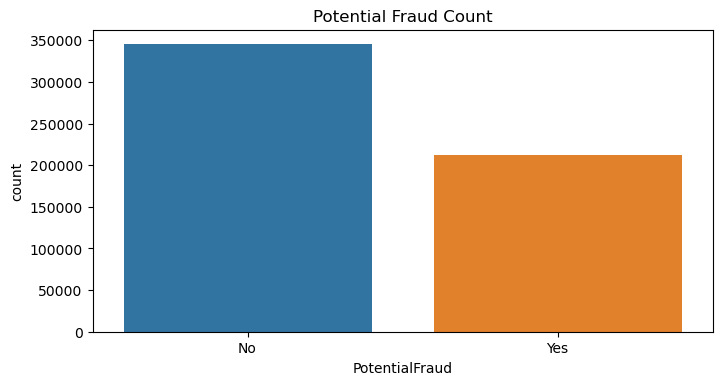

In [23]:
plt.figure(figsize = (8,4), dpi=100)
chart = sns.countplot(x = train_fulldata['PotentialFraud'], palette=['#1f77b4','#ff7f0e'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Potential Fraud Count');
#plt.savefig('Potential Fraud Count', bbox_inches='tight');

Text(0.5, 1.0, 'Fraud Percentrage')

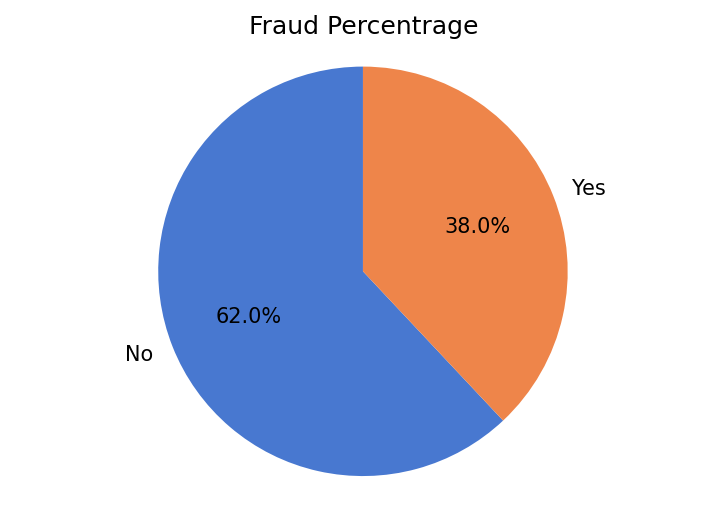

In [24]:
fraud_perc = round(train_fulldata['PotentialFraud'].value_counts()/len(train_fulldata)*100,0).sort_values(ascending=False)
fig1, ax1 = plt.subplots(dpi=150)
ax1.pie(fraud_perc, labels = fraud_perc.index, autopct='%1.1f%%', radius=2,
        startangle=90, colors = sns.color_palette('muted'))
ax1.axis('equal')
ax1.set_title('Fraud Percentrage')
#plt.savefig('Fraud Percentrage Pie', bbox_inches='tight');

- **Noted** : 
    - 62% of the data do not have potential fraud while the remaining 38% are considered as potential fraud

#### Insurance Claim Reimbursement Visualization

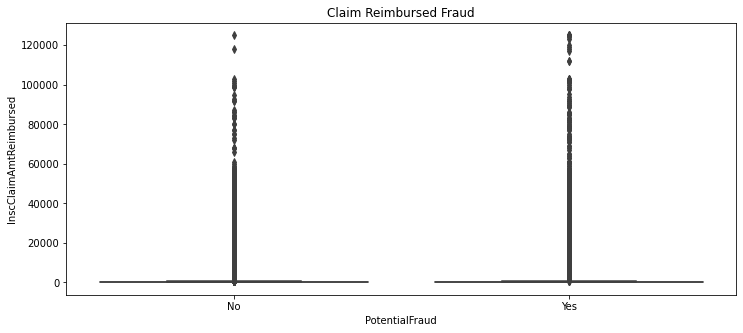

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train_fulldata, y = 'InscClaimAmtReimbursed', x='PotentialFraud')
plt.title('Claim Reimbursed Fraud')
plt.show()

- **Note**: There is no significant difference between fraud and non-fraud in the number of claim reimbursements

#### Reimbursement, Deductible, and Claim Amount Visualization

Text(0.5, 1.0, 'Deductible vs Reimbursement Inpatient Amount')

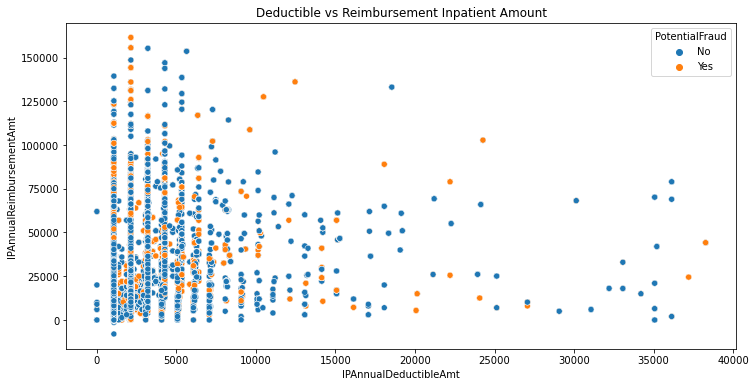

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_fulldata, x= 'IPAnnualDeductibleAmt', 
                y= 'IPAnnualReimbursementAmt', hue='PotentialFraud', palette=['#1f77b4','#ff7f0e'])
plt.title('Deductible vs Reimbursement Inpatient Amount')
#plt.savefig('Deductible vs Reimbursement Inpatient Amount Scatter', bbox_inches='tight');

Text(0.5, 1.0, 'Insurance Claim vs Reimbursement Outpatient Amount')

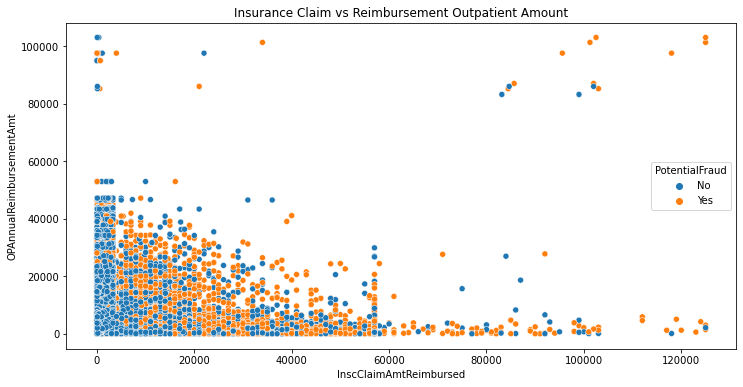

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_fulldata, x= 'InscClaimAmtReimbursed', 
                y= 'OPAnnualReimbursementAmt', hue='PotentialFraud', palette=['#1f77b4','#ff7f0e'])
plt.title('Insurance Claim vs Reimbursement Outpatient Amount')
#plt.savefig('Insurance Claim vs Reimbursement Outpatient Amount Scatter', bbox_inches='tight');

- **Note** : 
    - The lower the outpatient reimbursement amount and the higher the reimbursed claim amount, the higher the chance of fraud. Fraudulent behavior takes action by targeting a low amount of outpatient reimbursement but trying to get a high claim fee.

Text(0.5, 1.0, 'Insurance Claim vs Reimbursement Inpatient Amount')

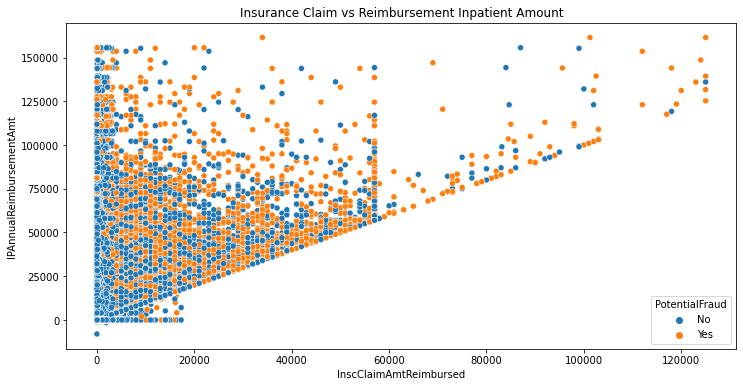

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_fulldata, x= 'InscClaimAmtReimbursed', 
                y= 'IPAnnualReimbursementAmt', hue='PotentialFraud', palette=['#1f77b4','#ff7f0e'])
plt.title('Insurance Claim vs Reimbursement Inpatient Amount')
#plt.savefig('Insurance Claim vs Reimbursement Inpatient Amount Scatter', bbox_inches='tight');

- **Note** 
    - The higher the amount of Annual Inpatient Reimbursement and the higher the Claim Reimbursed fee, the higher the possibility of fraud.

Text(0.5, 1.0, 'Deductible vs Claim Reimburse')

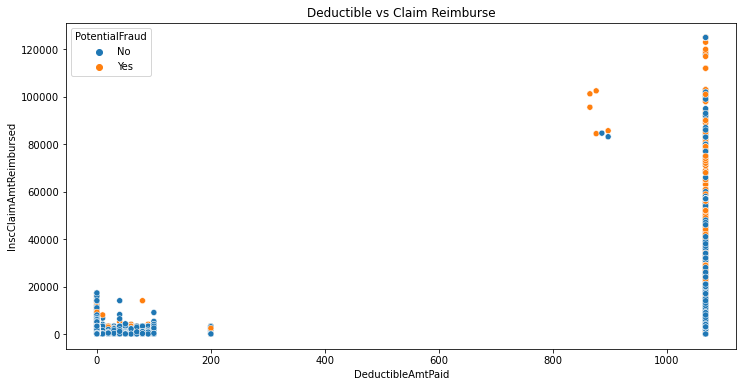

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_fulldata, x= 'DeductibleAmtPaid', 
                y= 'InscClaimAmtReimbursed', hue='PotentialFraud',palette=['#1f77b4','#ff7f0e'])
plt.title('Deductible vs Claim Reimburse')
#plt.savefig('Deductible vs Claim Reimburse Scatter', bbox_inches='tight');

- **Note**:
    - fraudulent behavior is carried out by targeting a relatively high claim amount fee with a high deductible cost as well. This high deductible usually occurs in cases that have a high risk or the possibility of a claim is relatively high
    - cases of serious illness or high risk are exploited by perpetrators to obtain high claim fees.

#### Chronic Condition Visualization

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
chronic_columns = ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'RenalDiseaseIndicator']

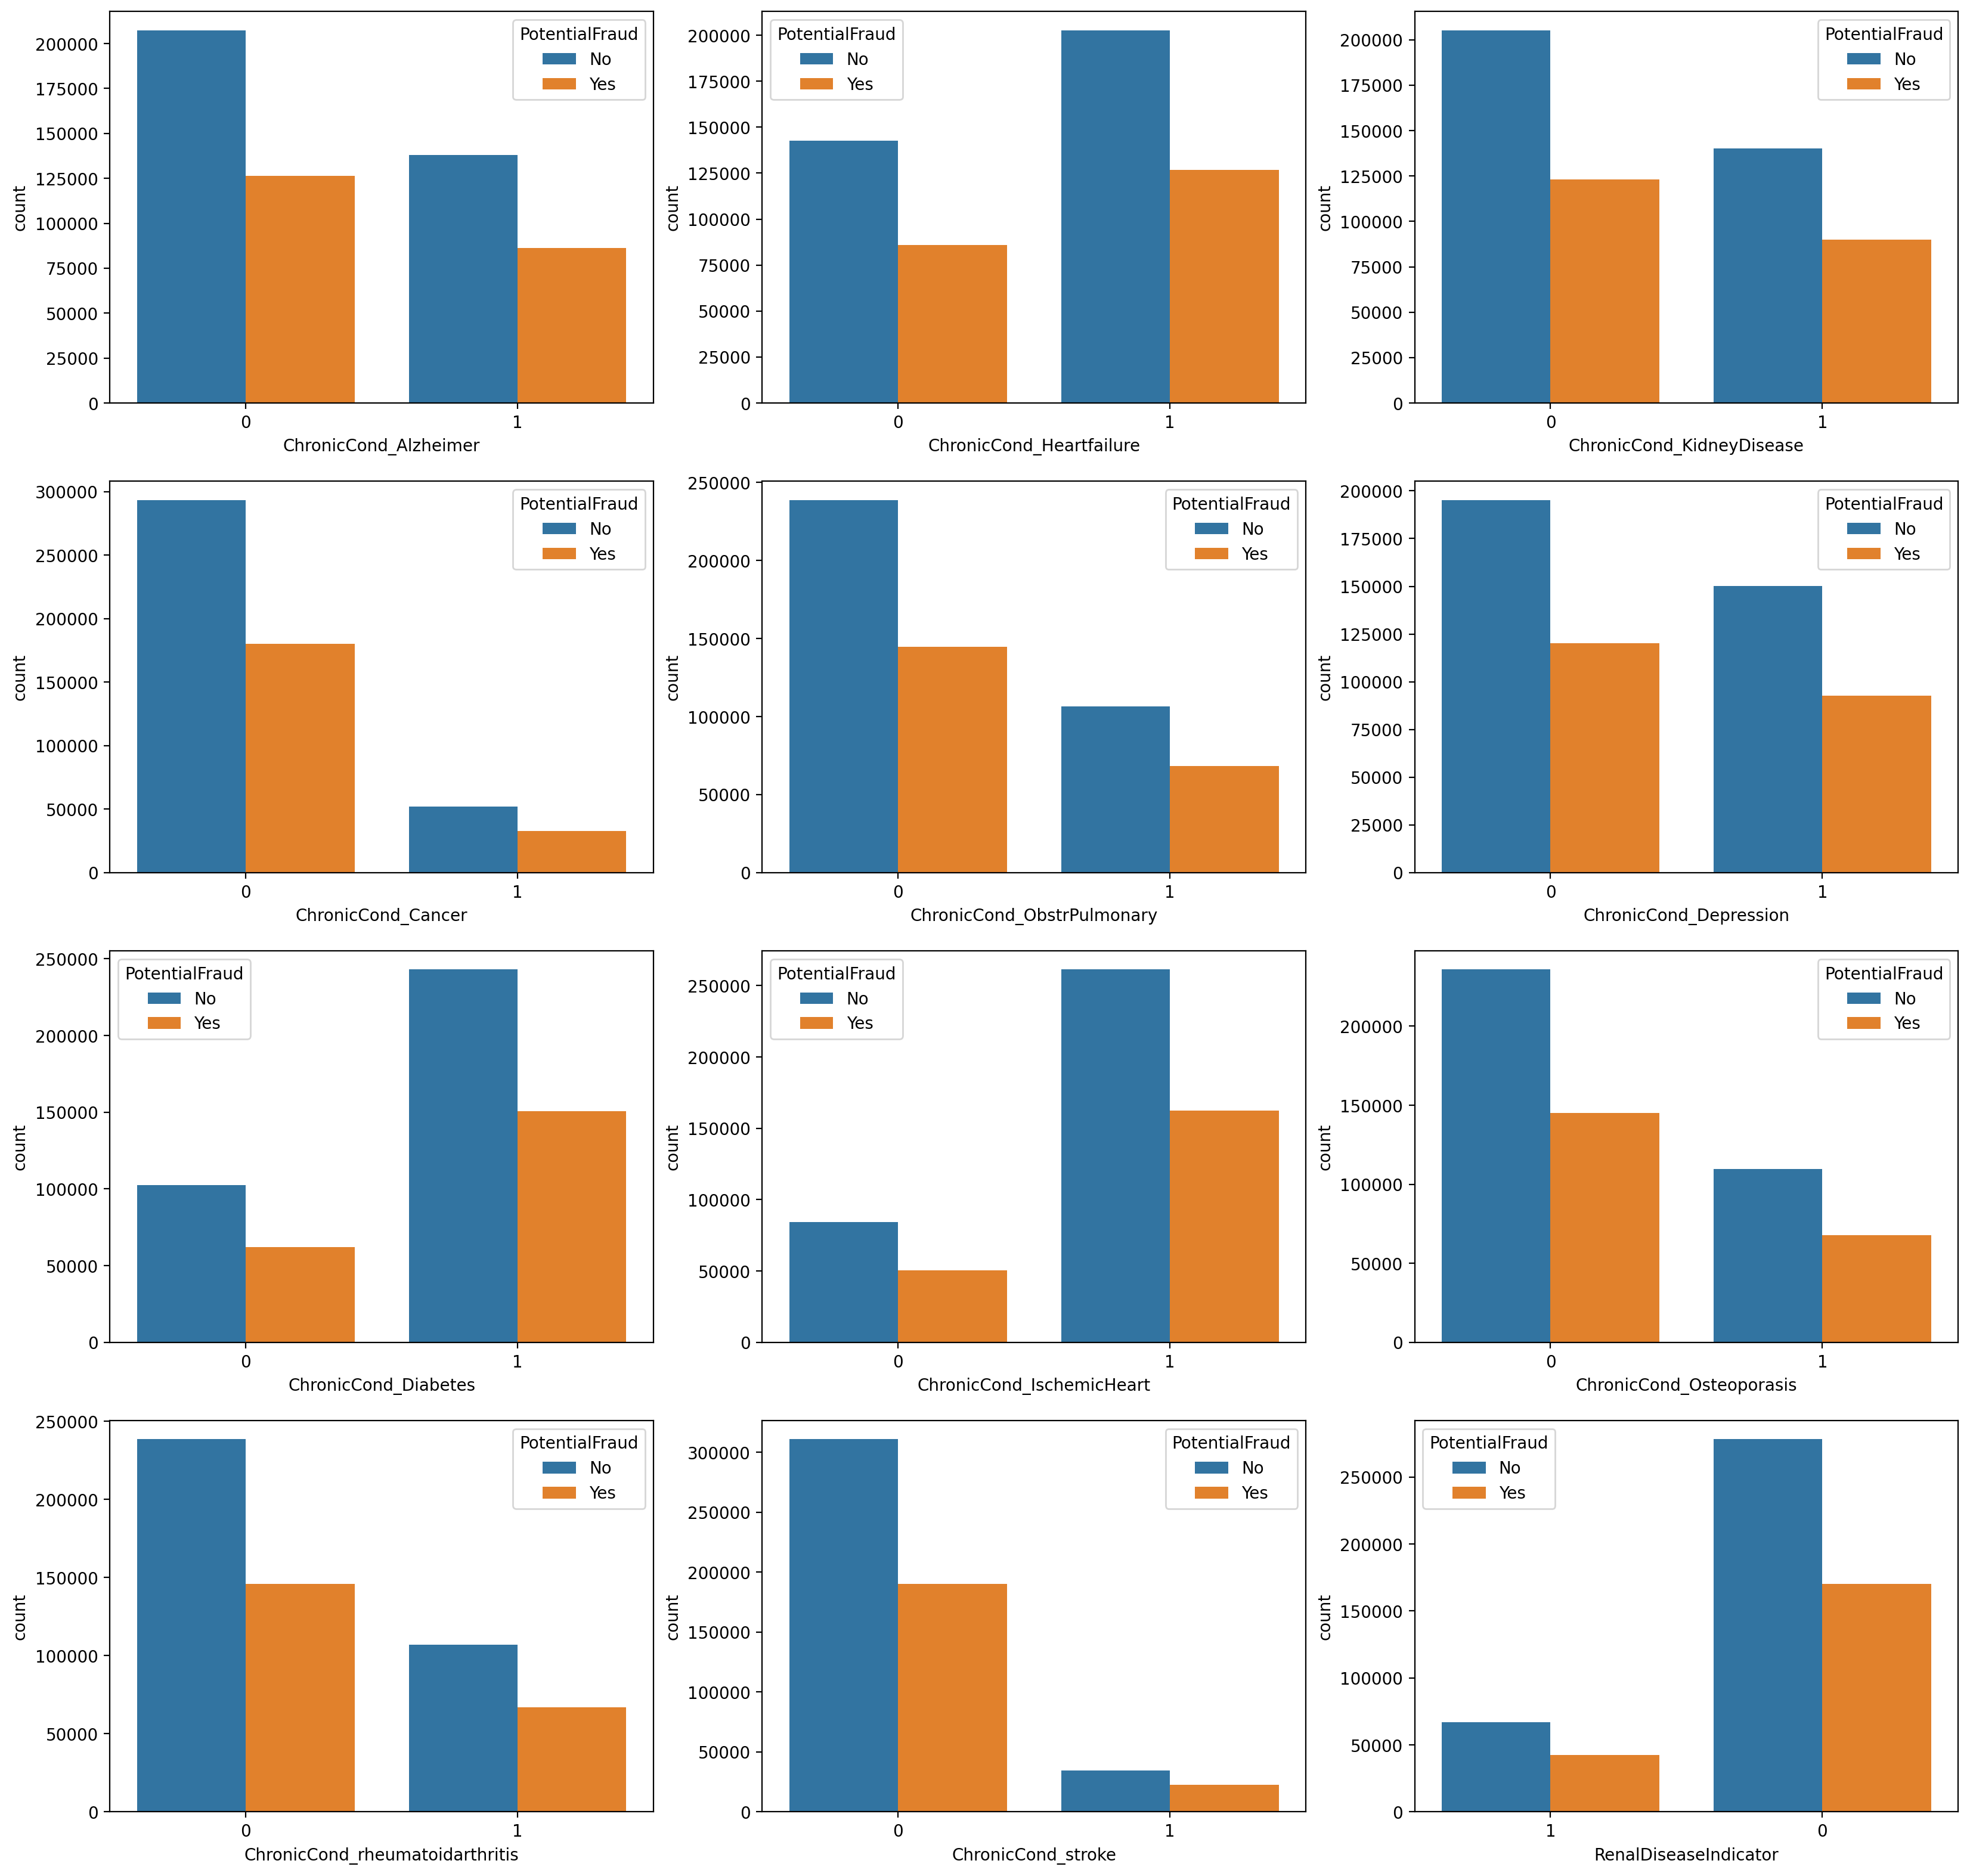

In [33]:
plt.figure(figsize=(20,20), dpi=200)
for i,feature in enumerate(chronic_columns):
    plt.subplot(4,3,i+1)
    sns.countplot(train_fulldata[feature], hue=train_fulldata['PotentialFraud'], palette=['#1f77b4','#ff7f0e'])
#plt.savefig('Chronic Condition Count', bbox_inches='tight');

- **Note**:
    - The highest potential for fraud occurs in cases of chronic conditions of Diabetes, Ischemic Heart, and Heart Failure. This disease is used to get high claims in outpatients and inpatients. Chronic conditions such as stroke and cancer have the lowest cases number of fraud.

#### Age Visualization

68.0    21928
71.0    21849
69.0    21425
70.0    21412
67.0    21181
74.0    20445
75.0    20208
73.0    20201
72.0    19987
76.0    19198
Name: Age, dtype: int64


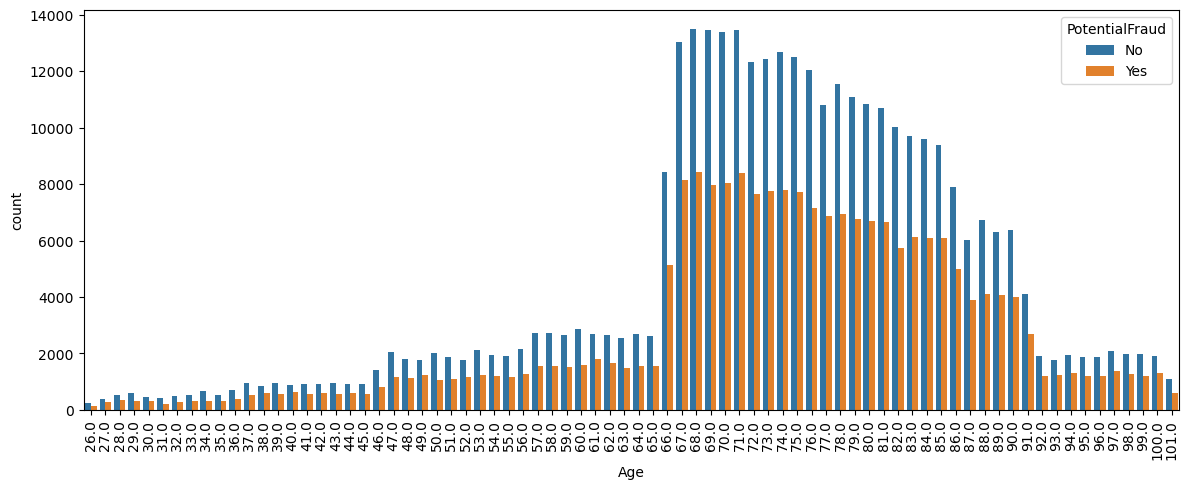

In [34]:
print(train_fulldata['Age'].value_counts().head(10))
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=train_fulldata, x='Age', hue='PotentialFraud', palette=['#1f77b4','#ff7f0e'])
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('Age Countplot', bbox_inches='tight');

- **Note**
    - The age range of 66-90 years is the most common fraud case. At this age, chronic conditions are very likely to occur.

#### State and County Visualization

5     51350
10    39073
33    35024
45    34022
14    24417
39    24251
23    21343
36    21291
34    18905
11    17003
Name: State, dtype: int64


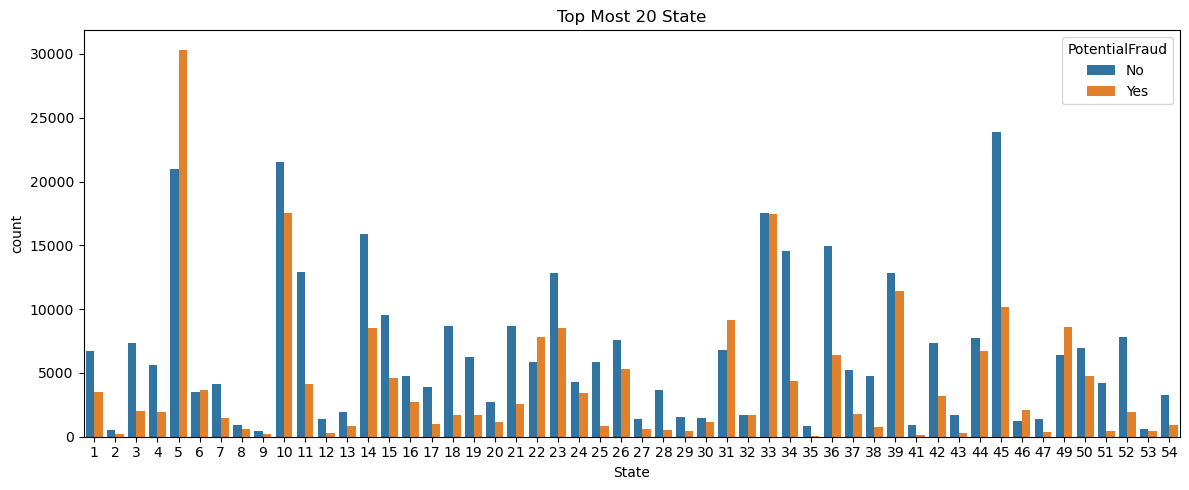

In [36]:
print(train_fulldata['State'].value_counts().head(10))
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=train_fulldata, x='State', hue='PotentialFraud', palette=['#1f77b4','#ff7f0e'])
plt.xticks(rotation=0)
plt.title('Top Most 20 State')
plt.tight_layout()
#plt.savefig('20 State Count', bbox_inches='tight');

- **Note**
    - State 5 is the state with the most frauds, the number of frauds in this state is more than non-fraud. The number of frauds in the state of 33 is no different from the number of non-frauds, it is difficult to distinguish a fraud case or not in this state.

In [37]:
#Top 20 County
county_fraud = pd.crosstab(train_fulldata.County, train_fulldata.PotentialFraud)
county_fraud['Total'] = county_fraud['No'] + county_fraud['Yes']
short_county_fraud = county_fraud.sort_values(by='Total', ascending=False).head(20)
short_county_fraud

PotentialFraud,No,Yes,Total
County,,,
200,5879,10078,15957
10,10750,3232,13982
20,8458,4174,12632
470,5230,7048,12278
60,8814,3181,11995
400,5735,5962,11697
0,6584,4897,11481
90,7007,4079,11086
160,5668,4865,10533


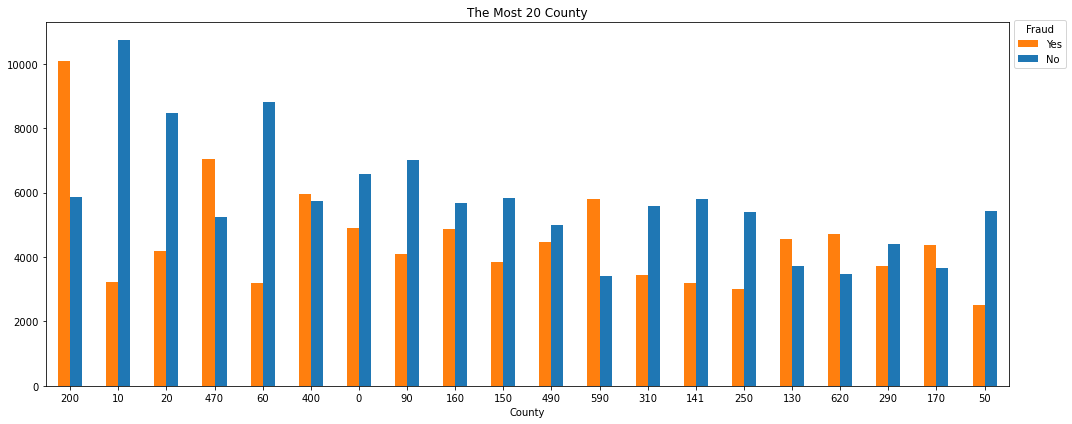

In [38]:
ax = short_county_fraud[['Yes','No']].plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
ax.legend(title='Fraud', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.xticks(rotation=0)
plt.title('The Most 20 County')
plt.tight_layout()
#plt.savefig('The Most 20 County Countplot', bbox_inches='tight');

- **Note**
    - County 200 is the state with the highest number of fraud cases, followed by county 470 and ounty 400. Fraud cases in this state are much higher than non-fraud cases.

In [39]:
county_state_fraud = pd.crosstab([train_fulldata.County, train_fulldata.State], train_fulldata.PotentialFraud)
county_state_fraud['Total'] = county_state_fraud['No'] + county_state_fraud['Yes']
short_countystate_fraud = county_state_fraud.sort_values(by='Total', ascending=False).head(20)
short_countystate_fraud

,PotentialFraud,No,Yes,Total
County,State,,,
200,5,3302,8998,12300
141,14,5776,3193,8969
60,3,4208,1014,5222
470,5,821,4266,5087
400,5,734,3589,4323
590,33,526,3681,4207
331,33,773,3284,4057
810,23,1834,1633,3467
390,45,1502,1887,3389


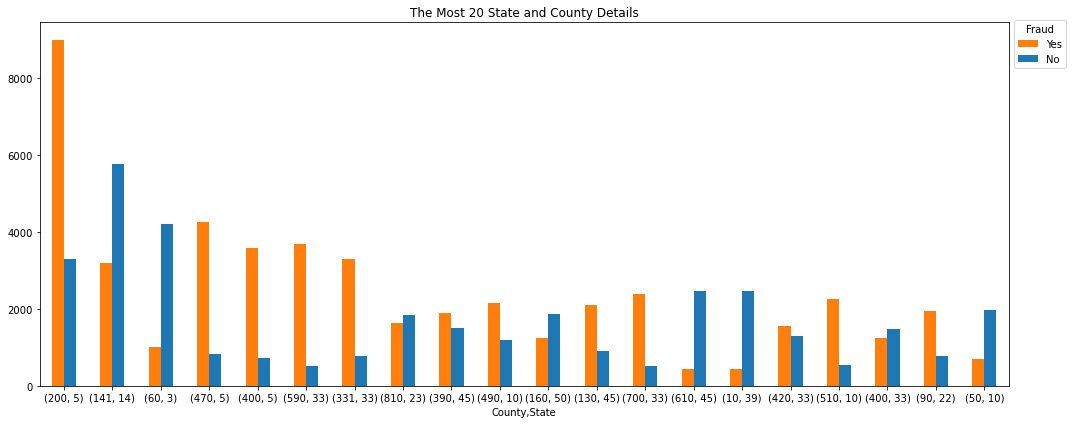

In [40]:
ax = short_countystate_fraud[['Yes','No']].plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
ax.legend(title='Fraud', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.xticks(rotation=0)
plt.title('The Most 20 State and County Details')
plt.tight_layout()
#plt.savefig('The Most 20 State and County Details', bbox_inches='tight');

- **Note**
    - In detail, state 5 in county 200 is the area with the most fraud cases, followed by state 5 in county 470.

#### Providers and Beneficiary Visualization

In [41]:
providers_fraud = pd.crosstab(train_fulldata.Provider, train_fulldata.PotentialFraud)
providers_fraud['Total'] = providers_fraud['No'] + providers_fraud['Yes']
short_providers_fraud_only = providers_fraud.sort_values(by='Total', ascending=False)
short_providers_fraud_only

PotentialFraud,No,Yes,Total
Provider,,,
PRV51459,0,8240,8240
PRV53797,0,4739,4739
PRV51574,0,4444,4444
PRV53918,0,3588,3588
PRV54895,0,3436,3436
...,...,...,...
PRV56373,1,0,1
PRV52221,1,0,1
PRV55578,1,0,1


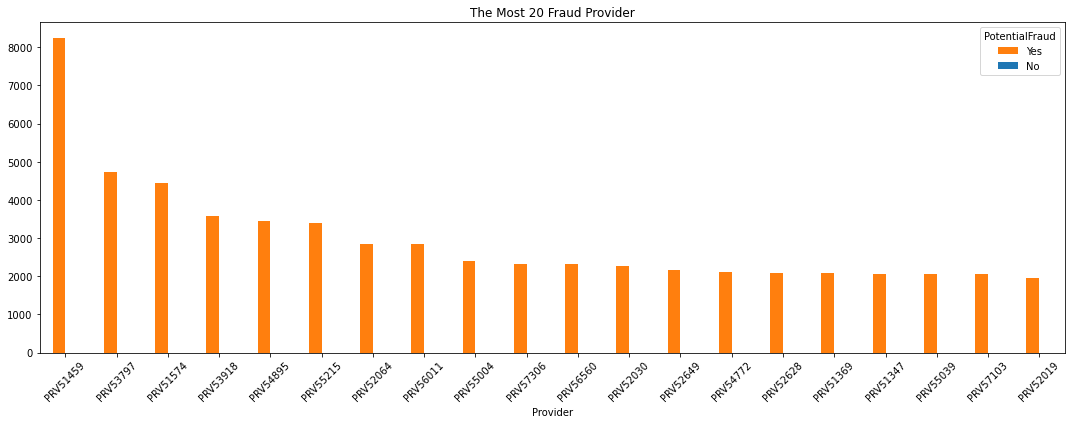

In [42]:
ax = short_providers_fraud_only[['Yes','No']].head(20).plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
plt.xticks(rotation=45)
plt.title('The Most 20 Fraud Provider')
plt.tight_layout()
#plt.savefig('The Most 20 Fraud Provider', bbox_inches='tight');

- **Note**
    - Provider PRV51459 is the provider with the highest number of fraud cases. These 20 prividers are providers who always commit fraud.

In [43]:
providers__countystate_fraud = pd.crosstab([train_fulldata.Provider,train_fulldata.State, train_fulldata.County], train_fulldata.PotentialFraud)
providers__countystate_fraud['Total'] = providers__countystate_fraud['No'] + providers__countystate_fraud['Yes']
short_providers__countystate_fraud = providers__countystate_fraud.sort_values(by='Total', ascending=False)
short_providers__countystate_fraud.head(20)

,,PotentialFraud,No,Yes,Total
Provider,State,County,,,
PRV51459,5,200,0,7744,7744
PRV54895,33,590,0,2599,2599
PRV55004,33,331,0,2077,2077
PRV55039,33,700,0,1976,1976
PRV51574,5,440,0,1935,1935
PRV51369,5,470,0,1923,1923
PRV56560,45,130,0,1904,1904
PRV51347,5,400,0,1862,1862
PRV52628,14,141,0,1699,1699


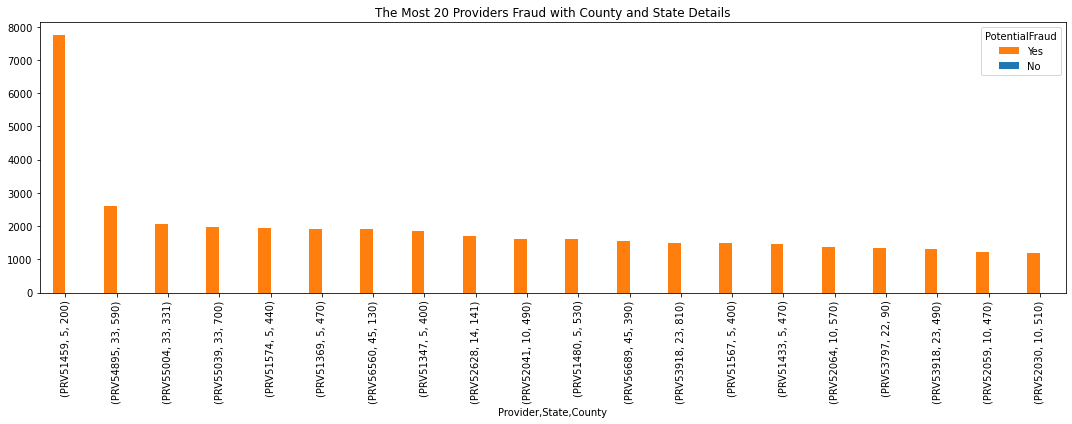

In [44]:
ax = short_providers__countystate_fraud[['Yes','No']].head(20).plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
plt.xticks(rotation=90)
plt.title('The Most 20 Providers Fraud with County and State Details')
plt.tight_layout()
#plt.savefig('The Most 20 Providers Fraud with County and State Details', bbox_inches='tight');

- **Note**
    - Provider PRV51459 from county 200 state 5 is the provider with the highest number of fraud cases

In [45]:
beneficiary_fraud = pd.crosstab(train_fulldata.BeneID, train_fulldata.PotentialFraud)
beneficiary_fraud['Total'] = beneficiary_fraud['No'] + beneficiary_fraud['Yes']
short_beneficiary_fraud_only = beneficiary_fraud.sort_values(by='Total', ascending=False)
short_beneficiary_fraud_only

PotentialFraud,No,Yes,Total
BeneID,,,
BENE118316,1,28,29
BENE42721,29,0,29
BENE59303,6,23,29
BENE44241,27,1,28
BENE80977,7,21,28
...,...,...,...
BENE60176,0,1,1
BENE138920,0,1,1
BENE60182,1,0,1


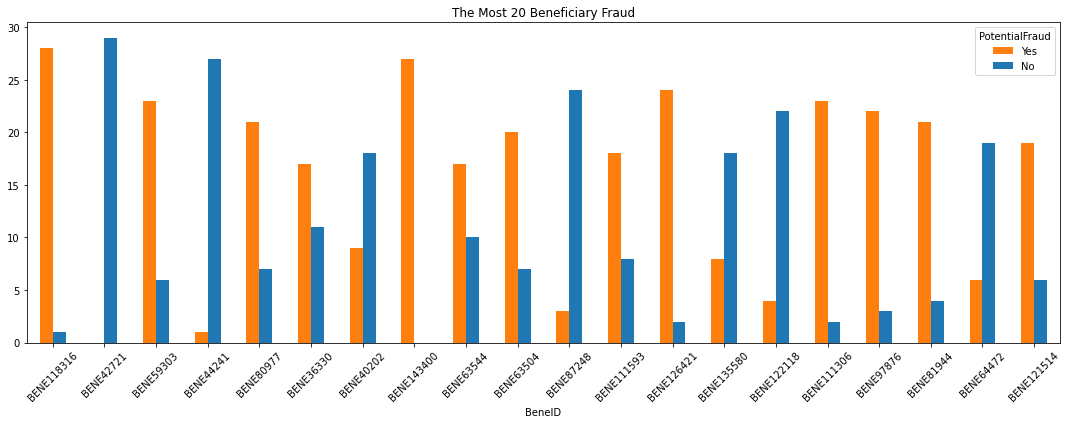

In [46]:
ax = short_beneficiary_fraud_only[['Yes','No']].head(20).plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
plt.xticks(rotation=45)
plt.title('The Most 20 Beneficiary Fraud')
plt.tight_layout()
#plt.savefig('The Most 20 Beneficiary Fraud ', bbox_inches='tight');

In [47]:
beneficiary__countystate_fraud = pd.crosstab([train_fulldata.BeneID,train_fulldata.State, train_fulldata.County], train_fulldata.PotentialFraud)
beneficiary__countystate_fraud['Total'] = beneficiary__countystate_fraud['No'] + beneficiary__countystate_fraud['Yes']
short_beneficiary__countystate_fraud= beneficiary__countystate_fraud.sort_values(by='Total', ascending=False)
short_beneficiary__countystate_fraud.head(20)

,,PotentialFraud,No,Yes,Total
BeneID,State,County,,,
BENE118316,11,750,1,28,29
BENE42721,19,470,29,0,29
BENE59303,39,770,6,23,29
BENE44241,19,70,27,1,28
BENE80977,50,260,7,21,28
BENE36330,14,989,11,17,28
BENE40202,22,0,18,9,27
BENE143400,49,560,0,27,27
BENE63544,5,200,10,17,27


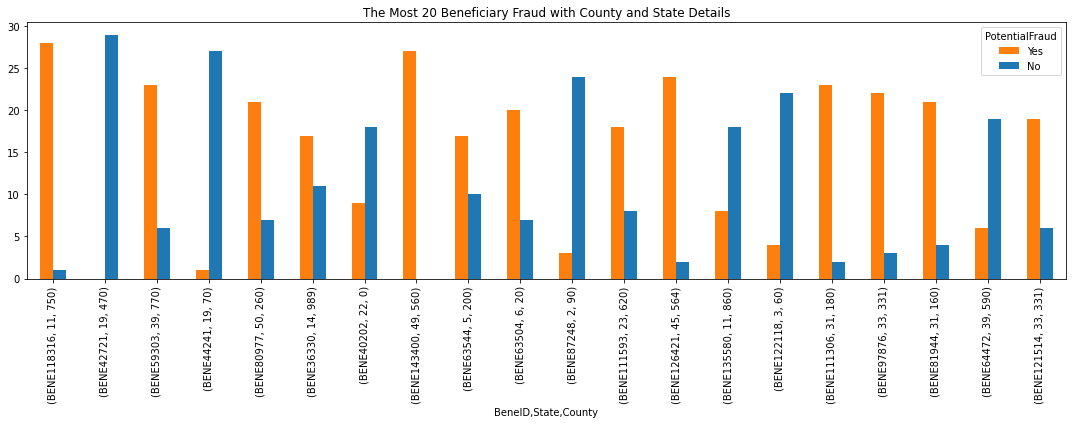

In [48]:
ax = short_beneficiary__countystate_fraud[['Yes','No']].head(20).plot.bar(figsize=(15,6), color=['#ff7f0e', '#1f77b4'])
plt.xticks(rotation=90)
plt.title('The Most 20 Beneficiary Fraud with County and State Details')
plt.tight_layout()
#plt.savefig('The Most 20 Beneficiary Fraud with County and State Details', bbox_inches='tight');

- **Note**
    - Beneficiary BENE118316 from county 750 state 11 was the most fraudulent, followed by beneficiary BENE143400 from county 560 state 49.

- **Note**
    - There is a difference fraud region between the most providers and the most beneficiaries, this shows that systematic fraud rarely involves the beneficiaries,  providers, and the physician at the same time. However, there is still a possibility that this systematic fraud could occur.

## Feature Engineering

In [49]:
train_dataset = train_fulldata.copy()
test_dataset = test_fulldata.copy()

In [50]:
train_dataset['PotentialFraud'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
# Mapping Potential fraud, 0 for No, and 1 for Yes
map = {'No':0, 'Yes':1}
train_dataset['PotentialFraud'] = train_dataset['PotentialFraud'].map(map)

In [52]:
train_dataset['PotentialFraud'].unique()

array([0, 1], dtype=int64)

In [53]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

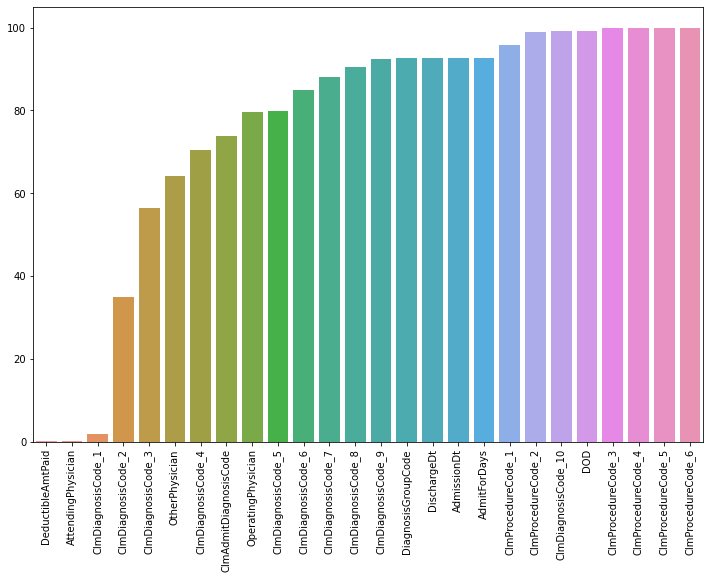

In [54]:
percent_nan = percent_missing(train_dataset)
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [55]:
# Replace Nan with 0 which means no claim  code and 1 for claim  code

claim_columns = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

##Train
train_dataset[claim_columns] = train_dataset[claim_columns].replace({np.nan:0})

for i in claim_columns:
    train_dataset[i][train_dataset[i]!=0]= 1

# change type claim columns in data to float type 
train_dataset[claim_columns]= train_dataset[claim_columns].astype(float)


##Test
test_dataset[claim_columns] = test_dataset[claim_columns].replace({np.nan:0})

for i in claim_columns:
    test_dataset[i][test_dataset[i]!=0]= 1

# change type claim columns in data to float type 
test_dataset[claim_columns]= test_dataset[claim_columns].astype(float)

In [56]:
# Create TotalDianosis colum for sum of diagnosis columns for each rows

##Train
train_dataset['TotalDiagnosis'] = \
train_dataset['ClmDiagnosisCode_1']+ train_dataset['ClmDiagnosisCode_2']+ train_dataset['ClmDiagnosisCode_3']+ train_dataset['ClmDiagnosisCode_4']+ train_dataset['ClmDiagnosisCode_5']+ train_dataset['ClmDiagnosisCode_6']+ train_dataset['ClmDiagnosisCode_7']+ train_dataset['ClmDiagnosisCode_8']+ train_dataset['ClmDiagnosisCode_9']+ train_dataset['ClmDiagnosisCode_10']

##Test
test_dataset['TotalDiagnosis'] = \
test_dataset['ClmDiagnosisCode_1']+ test_dataset['ClmDiagnosisCode_2']+ test_dataset['ClmDiagnosisCode_3']+ test_dataset['ClmDiagnosisCode_4']+ test_dataset['ClmDiagnosisCode_5']+ test_dataset['ClmDiagnosisCode_6']+ test_dataset['ClmDiagnosisCode_7']+ test_dataset['ClmDiagnosisCode_8']+ test_dataset['ClmDiagnosisCode_9']+ test_dataset['ClmDiagnosisCode_10']

In [57]:
# Create TotalProcedure colum for sum of procedure columns for each rows

##Train
train_dataset['TotalProcedure']= \
train_dataset['ClmProcedureCode_1']+ train_dataset['ClmProcedureCode_2']+ train_dataset['ClmProcedureCode_3']+ train_dataset['ClmProcedureCode_4']+ train_dataset['ClmProcedureCode_5']+train_dataset['ClmProcedureCode_6']

##Test
test_dataset['TotalProcedure']= \
test_dataset['ClmProcedureCode_1']+ test_dataset['ClmProcedureCode_2']+ test_dataset['ClmProcedureCode_3']+ test_dataset['ClmProcedureCode_4']+ test_dataset['ClmProcedureCode_5']+test_dataset['ClmProcedureCode_6']

In [58]:
# Creat columns for admission days, the lowest admission days is 1 
# which means admission days processed in that day

#Train
train_dataset['AdmissionDt'] = pd.to_datetime(train_dataset['AdmissionDt'] , format = '%Y-%m-%d')
train_dataset['DischargeDt'] = pd.to_datetime(train_dataset['DischargeDt'],format = '%Y-%m-%d')
train_dataset['AdmitForDays'] = ((train_dataset['DischargeDt'] - train_dataset['AdmissionDt']).dt.days)+1

#Test
test_dataset['AdmissionDt'] = pd.to_datetime(test_dataset['AdmissionDt'] , format = '%Y-%m-%d')
test_dataset['DischargeDt'] = pd.to_datetime(test_dataset['DischargeDt'],format = '%Y-%m-%d')
test_dataset['AdmitForDays'] = ((test_dataset['DischargeDt'] - test_dataset['AdmissionDt']).dt.days)+1

In [59]:
# Replace Nan with 0 which means no phycisian code and 1 for phycisian code

##Train
train_dataset[['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']] = \
train_dataset[['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']].replace({np.nan:0})
for i in ['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']:
    train_dataset[i][train_dataset[i]!=0]= 1
    
## Test
test_dataset[['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']] = \
test_dataset[['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']].replace({np.nan:0})
for i in ['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician']:
    test_dataset[i][test_dataset[i]!=0]= 1

In [60]:
# Replace Nan with 0 which means no diagnosis group code and 1 for diagnosis group code

## Train
train_dataset['DiagnosisGroupCode'] = train_dataset['DiagnosisGroupCode'].replace({np.nan:0})
train_dataset['DiagnosisGroupCode'][train_dataset['DiagnosisGroupCode']!=0]= 1


## Test
test_dataset['DiagnosisGroupCode'] = test_dataset['DiagnosisGroupCode'].replace({np.nan:0})
test_dataset['DiagnosisGroupCode'][test_dataset['DiagnosisGroupCode']!=0]= 1

In [61]:
#Creat IsDead Colum for row has date of dead(DOD)
#Train
train_dataset.loc[train_dataset['DOD'].isnull(), 'IsDead'] = '0'
train_dataset.loc[(train_dataset['DOD'].notnull()), 'IsDead'] = '1'

#Test
test_dataset.loc[test_dataset['DOD'].isnull(), 'IsDead'] = '0'
test_dataset.loc[(test_dataset['DOD'].notnull()), 'IsDead'] = '1'

In [62]:
#Create ClaimDuration Columns from ClaimEndDt and ClaimStartDt

#Train
train_dataset['ClaimStartDt'] = pd.to_datetime(train_dataset['ClaimStartDt'] , format = '%Y-%m-%d')
train_dataset['ClaimEndDt'] = pd.to_datetime(train_dataset['ClaimEndDt'] , format = '%Y-%m-%d')

train_dataset['ClaimDuration'] = ((train_dataset['ClaimEndDt'] - train_dataset['ClaimStartDt']).dt.days)

#Test
test_dataset['ClaimStartDt'] = pd.to_datetime(test_dataset['ClaimStartDt'] , format = '%Y-%m-%d')
test_dataset['ClaimEndDt'] = pd.to_datetime(test_dataset['ClaimEndDt'] , format = '%Y-%m-%d')

test_dataset['ClaimDuration'] = ((test_dataset['ClaimEndDt'] - test_dataset['ClaimStartDt']).dt.days)

In [63]:
# Change State and County type to object

#Train
train_dataset[['State', 'County']] = train_dataset[['State', 'County']].astype(object)

#Test
test_dataset[['State', 'County']] = test_dataset[['State', 'County']].astype(object)

In [64]:
#Drop unused columns
columns = ['DischargeDt', 'AdmissionDt', 'AdmitForDays', 'DOD', 'DOB', 'ClaimStartDt', 'ClaimEndDt']

#Train
train_dataset.drop(columns, axis=1, inplace=True)

#Test
test_dataset.drop(columns, axis=1, inplace=True)

In [65]:
percent_nan = percent_missing(train_dataset)
percent_nan

DeductibleAmtPaid    0.16105
dtype: float64

In [66]:
percent_nan = percent_missing(test_dataset)
percent_nan

DeductibleAmtPaid    0.144765
dtype: float64

In [67]:
#Train
train_dataset.dropna(inplace=True)

#Test
test_dataset.dropna(inplace=True)

In [68]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135196 entries, 0 to 135391
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         135196 non-null  object 
 1   BeneID                           135196 non-null  object 
 2   ClaimID                          135196 non-null  object 
 3   InscClaimAmtReimbursed           135196 non-null  int64  
 4   AttendingPhysician               135196 non-null  object 
 5   OperatingPhysician               135196 non-null  object 
 6   OtherPhysician                   135196 non-null  object 
 7   ClmDiagnosisCode_1               135196 non-null  float64
 8   ClmDiagnosisCode_2               135196 non-null  float64
 9   ClmDiagnosisCode_3               135196 non-null  float64
 10  ClmDiagnosisCode_4               135196 non-null  float64
 11  ClmDiagnosisCode_5               135196 non-null  float64
 12  Cl

In [69]:
#Drop unused columns from claim columns
claim_columns = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

#Train
train_dataset.drop(claim_columns, axis=1 , inplace=True)

#Test
test_dataset.drop(claim_columns, axis=1 , inplace=True)

In [70]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557312 entries, 0 to 558210
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         557312 non-null  object 
 1   PotentialFraud                   557312 non-null  int64  
 2   BeneID                           557312 non-null  object 
 3   ClaimID                          557312 non-null  object 
 4   InscClaimAmtReimbursed           557312 non-null  int64  
 5   AttendingPhysician               557312 non-null  object 
 6   OperatingPhysician               557312 non-null  object 
 7   OtherPhysician                   557312 non-null  object 
 8   DeductibleAmtPaid                557312 non-null  float64
 9   DiagnosisGroupCode               557312 non-null  object 
 10  Gender                           557312 non-null  int64  
 11  Race                             557312 non-null  int64  
 12  Re

### Feature Selection

In [71]:
data = train_dataset.copy()

In [72]:
data.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'ClaimDuration', 'TotalDiagnosis', 'TotalProcedure', 'IsDead'],
      dtype='object')

In [73]:
# Drop unused columns
data.drop(['Provider', 'BeneID', 'ClaimID'], axis=1, inplace=True)

In [74]:
#Select columns with object type
object_col = data.dtypes[data.dtypes == 'object'].index
object_col

Index(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'DiagnosisGroupCode', 'RenalDiseaseIndicator', 'State', 'County',
       'IsDead'],
      dtype='object')

In [75]:
# Create mean encoding for each object columns
enc_dict = []
for col in object_col:
    dict = data.groupby([col])['PotentialFraud'].mean().to_dict()
    data[col] = data[col].map(dict)
    enc_dict.append(dict)

In [76]:
#Select independent columns and dependent column
ind_col=[col for col in data.columns if col!='PotentialFraud']
dep_col='PotentialFraud'

In [77]:
X=data[ind_col]
y=data[dep_col]

In [78]:
# Scaling data with Minmax Scaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [79]:
#feature selection with chi2 score
ordered_rank_features=SelectKBest(score_func=chi2,k=8)
ordered_feature=ordered_rank_features.fit(scaled_X,y)

In [80]:
ordered_feature

SelectKBest(k=8, score_func=<function chi2 at 0x0000015B2458C8B0>)

In [81]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([4.15938839e+02, 1.49328807e-03, 3.94869263e+02, 2.47530076e+01,
       6.30150549e+03, 6.55148238e+03, 4.34067866e-02, 1.69661856e+02,
       2.34209189e+01, 5.38649634e+03, 2.17218320e+03, 7.83239330e-02,
       8.59220842e-03, 1.16333122e+01, 1.72944495e+01, 8.24512014e+01,
       6.47866288e+00, 5.14343607e+01, 1.87232626e-02, 4.23858624e+00,
       8.44076293e+00, 5.12469062e-01, 9.33334322e+00, 4.06891530e+01,
       3.91953049e+01, 4.57616071e+01, 1.18973697e-01, 4.70685229e-01,
       1.71671361e+00, 1.67264771e+02, 4.59587295e+02, 1.01076472e+03,
       7.98299861e-03])

In [82]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,datascores],axis=1)

#fetch all Score column
features_rank.columns=['Features','Score']
features_rank.nlargest(len(X.columns),'Score')

,Features,Score
5,DiagnosisGroupCode,6551.482384
4,DeductibleAmtPaid,6301.505491
9,State,5386.496343
10,County,2172.183201
31,TotalProcedure,1010.764724
30,TotalDiagnosis,459.587295
0,InscClaimAmtReimbursed,415.938839
2,OperatingPhysician,394.869263
7,Race,169.661856
29,ClaimDuration,167.264771


In [83]:
# Select 8 columns from 8 highest chi2 score
selected_columns=features_rank.nlargest(8,'Score')['Features'].values

In [84]:
X_feat=data[selected_columns]

In [85]:
X_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557312 entries, 0 to 558210
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DiagnosisGroupCode      557312 non-null  float64
 1   DeductibleAmtPaid       557312 non-null  float64
 2   State                   557312 non-null  float64
 3   County                  557312 non-null  float64
 4   TotalProcedure          557312 non-null  float64
 5   TotalDiagnosis          557312 non-null  float64
 6   InscClaimAmtReimbursed  557312 non-null  int64  
 7   OperatingPhysician      557312 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 38.3 MB


In [86]:
X_feat.head()

,DiagnosisGroupCode,DeductibleAmtPaid,State,County,TotalProcedure,TotalDiagnosis,InscClaimAmtReimbursed,OperatingPhysician
0,0.365811,0.0,0.344261,0.302943,0.0,2.0,20,0.373569
1,0.365811,0.0,0.344261,0.578587,0.0,6.0,700,0.373569
2,0.365811,0.0,0.344261,0.302943,0.0,1.0,900,0.373569
3,0.365811,0.0,0.344261,0.283019,0.0,6.0,500,0.409506
4,0.578497,1068.0,0.344261,0.510344,0.0,8.0,36000,0.373569


#### Train Test Split Dataset

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.30, random_state=10)

#### Random Under Sampling

In [88]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=101, replacement=True)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [89]:
print(f"Before resampling, counts of label 'Positive': {sum(y_train==1)}")
print(f"Before resampling, Counts of label 'Negative': {sum(y_train==0)}")

Before resampling, counts of label 'Positive': 148571
Before resampling, Counts of label 'Negative': 241547


In [90]:
print(f"After resampling, X_train shape: {sum(X_resampled.shape)}")
print(f"After resampling, y_train shape: {sum(y_resampled.shape)}")
print(f"After resampling, counts of label 'Positive': {sum(y_resampled==1)}")
print(f"After resampling, Counts of label 'Negative': {sum(y_resampled==0)}")

After resampling, X_train shape: 297150
After resampling, y_train shape: 297142
After resampling, counts of label 'Positive': 148571
After resampling, Counts of label 'Negative': 148571


## Machine Learning Classifier Model

### Decision Tree

In [91]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_resampled, y_resampled)
#Predict Decision Tree Classifier
dt_predict = dt.predict(X_test)

#Classification report Decision Tree Classifier
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74    103477
           1       0.59      0.72      0.65     63717

    accuracy                           0.71    167194
   macro avg       0.70      0.71      0.70    167194
weighted avg       0.72      0.71      0.71    167194



### Random Forest

In [92]:
# Random Forrest Clasifier
RF = RandomForestClassifier(random_state=10, class_weight='balanced')
RF.fit(X_resampled, y_resampled)

#Predict Random Forrest Clasifier
rf_predict = RF.predict(X_test)

#Classification report Random Forrest Clasifier 
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74    103477
           1       0.59      0.75      0.66     63717

    accuracy                           0.71    167194
   macro avg       0.70      0.72      0.70    167194
weighted avg       0.73      0.71      0.71    167194



### Gradient Boosting

In [93]:
# Gradien Boost Classifier
gb = GradientBoostingClassifier(random_state=10)

gb.fit(X_resampled, y_resampled)

# Predict Gradien Boost Classifier
gb_predics = gb.predict(X_test)

#Classification report Gradien Boost Classifier 
print(classification_report(y_test,gb_predics))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74    103477
           1       0.59      0.66      0.62     63717

    accuracy                           0.69    167194
   macro avg       0.68      0.69      0.68    167194
weighted avg       0.70      0.69      0.70    167194



### Adaptive Boost

In [94]:
# Adaptive Boost Classifier
abc = AdaBoostClassifier(random_state = 10)
abc.fit(X_resampled, y_resampled)

#Predict Adaptive Boost CLassifier
abc_preds = abc.predict(X_test)

#Classification report Adaptive Boost CLassifier 
print(classification_report(y_test, abc_preds))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71    103477
           1       0.55      0.67      0.61     63717

    accuracy                           0.67    167194
   macro avg       0.66      0.67      0.66    167194
weighted avg       0.68      0.67      0.67    167194



### Logistic Regression

In [95]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr',max_iter = 1000)

In [96]:
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_resampled)
scaled_X_test = scaler.transform(X_test)

In [97]:
log_model.fit(scaled_X_train, y_resampled)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='saga')

In [98]:
y_pred = log_model.predict(scaled_X_test)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72    103477
           1       0.56      0.66      0.61     63717

    accuracy                           0.67    167194
   macro avg       0.66      0.67      0.66    167194
weighted avg       0.69      0.67      0.68    167194



### XG Boost

In [100]:
xgb= XGBClassifier(random_state=10)
xgb.fit(X_resampled, y_resampled)
#Predict Adaptive Boost CLassifier
xgb_pred = xgb.predict(X_test)

#Classification report Adaptive Boost CLassifier 
print(classification_report(y_test, xgb_pred))

[17:36:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.78      0.80    103477
           1       0.67      0.73      0.70     63717

    accuracy                           0.76    167194
   macro avg       0.74      0.75      0.75    167194
weighted avg       0.76      0.76      0.76    167194



### GridCV for XGBoost 

In [101]:
# GridCV untuk XG Boost Classifier
xgb= XGBClassifier(random_state=10)
param_grid = {"learning_rate"    : [0.1, 0.20, 0.25 ] ,
              "max_depth"        : [ 5, 8, 10]}
grid = GridSearchCV(xgb, param_grid)
grid.fit(X_resampled, y_resampled)

#Predict Gradien Boost Classifier
grid_predics = grid.predict(X_test)

#Classification report XG Boost Classifier  
print(classification_report(y_test,grid_predics))

[17:36:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [102]:
import pickle

In [103]:
pickle.dump(grid, open('XGB_grid.pkl', 'wb'))

In [104]:
# Best parameter 
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 10}

In [105]:
xgb_best= XGBClassifier(random_state=10, learning_rate=0.25, max_depth=10)
xgb_best.fit(X_resampled, y_resampled)
#Predict Adaptive Boost CLassifier
xgb_best_pred = xgb_best.predict(X_test)

#Classification report Adaptive Boost CLassifier 
print(classification_report(y_test, xgb_best_pred))

[17:57:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.78      0.81    103477
           1       0.68      0.75      0.71     63717

    accuracy                           0.77    167194
   macro avg       0.76      0.77      0.76    167194
weighted avg       0.78      0.77      0.77    167194



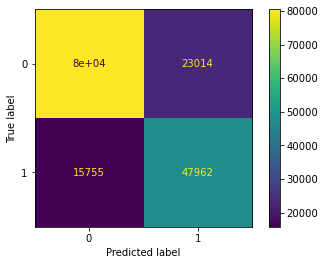

In [106]:
#Confusion Matrix Xgboost Classifier
plot_confusion_matrix(xgb_best, X_test, y_test)
#plt.savefig('conf matrix xgb_best', bbox_inches='tight');

In [107]:
#feature impoertance
xgb_best.feature_importances_

array([0.18481392, 0.23754478, 0.2613297 , 0.21097471, 0.02621534,
       0.02618922, 0.02724624, 0.02568609], dtype=float32)

In [108]:
#feature impoertance data frame
feat_imp = xgb_best.feature_importances_
feat_imp_xgb = pd.DataFrame(data = xgb_best.feature_importances_, index = X_resampled.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
feat_imp_xgb

,Importance
State,0.261330
DeductibleAmtPaid,0.237545
County,0.210975
DiagnosisGroupCode,0.184814
InscClaimAmtReimbursed,0.027246
TotalProcedure,0.026215
TotalDiagnosis,0.026189
OperatingPhysician,0.025686


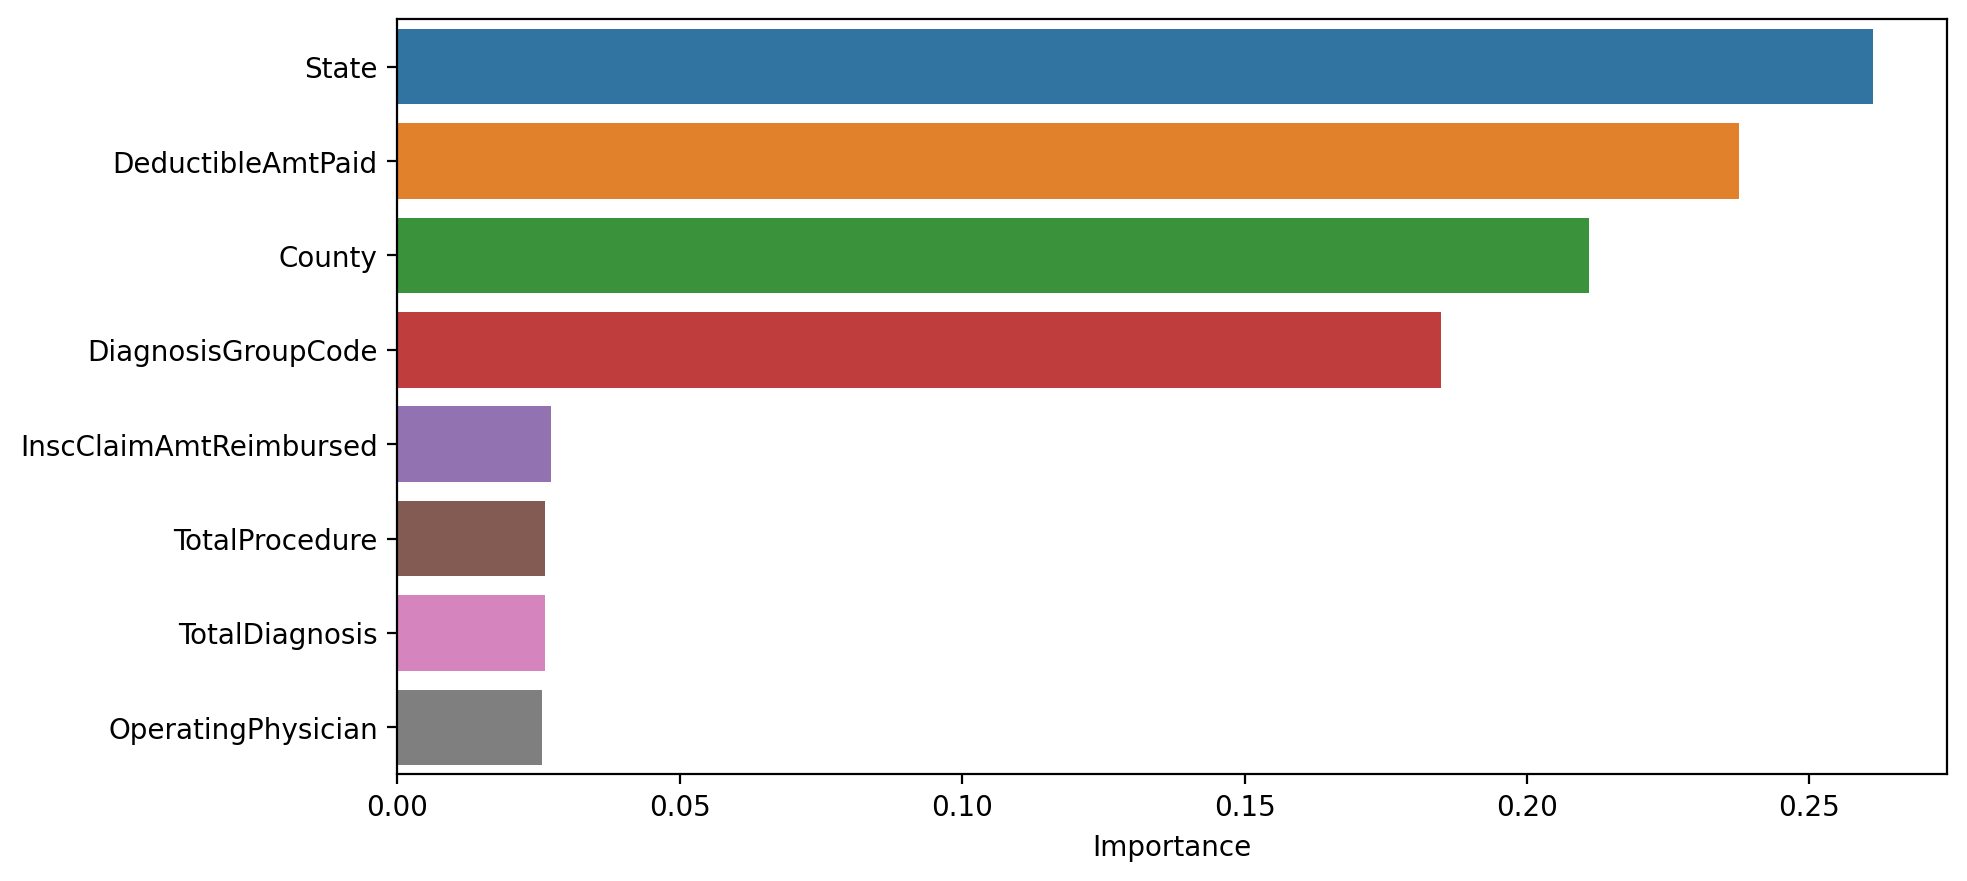

In [109]:
#plot feature importtances
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(data=feat_imp_xgb, x='Importance', y=feat_imp_xgb.index)
plt.xticks(rotation=0);
#plt.savefig('feature importtances', bbox_inches='tight');

In [110]:
xgb_best.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Neural Network

In [111]:
import tensorflow as tf

In [122]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(8, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               4500      
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 1)                 501       
                                                                 
Total params: 255,501
Trainable params: 255,501
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [125]:
epochs_hist = model.fit(scaled_X_train, y_resampled, epochs = 50, batch_size = 50)

Epoch 1/50
5943/5943 [==============================] - 54s 9ms/step - loss: 0.6084 - accuracy: 0.6773
Epoch 2/50
5943/5943 [==============================] - 53s 9ms/step - loss: 0.6060 - accuracy: 0.6787
Epoch 3/50
5943/5943 [==============================] - 56s 9ms/step - loss: 0.6040 - accuracy: 0.6797
Epoch 4/50
5943/5943 [==============================] - 52s 9ms/step - loss: 0.6024 - accuracy: 0.6807
Epoch 5/50
5943/5943 [==============================] - 52s 9ms/step - loss: 0.6009 - accuracy: 0.6807
Epoch 6/50
5943/5943 [==============================] - 57s 10ms/step - loss: 0.5989 - accuracy: 0.6820
Epoch 7/50
5943/5943 [==============================] - 54s 9ms/step - loss: 0.5971 - accuracy: 0.6841
Epoch 8/50
5943/5943 [==============================] - 54s 9ms/step - loss: 0.5955 - accuracy: 0.6860
Epoch 9/50
5943/5943 [==============================] - 53s 9ms/step - loss: 0.5942 - accuracy: 0.6879
Epoch 10/50
5943/5943 [==============================] - 54s 9ms/step - 

In [126]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

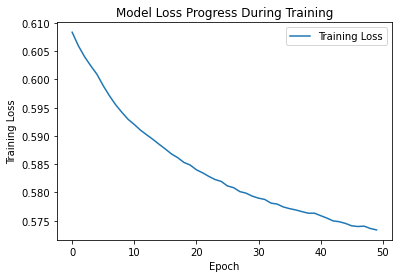

In [127]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

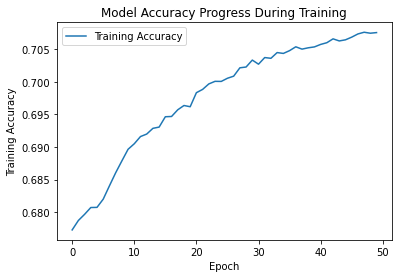

In [128]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

In [129]:
y_pred = model.predict(scaled_X_test)

In [132]:
y_pred
y_pred = (y_pred > 0.5)

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    103477
           1       0.62      0.65      0.64     63717

    accuracy                           0.72    167194
   macro avg       0.70      0.70      0.70    167194
weighted avg       0.72      0.72      0.72    167194



## Test Dataset Predictions

In [108]:
test_df = test_dataset.copy()

In [109]:
test_df.drop(['Provider', 'BeneID', 'ClaimID'], axis=1, inplace=True)

In [110]:
#Select columns with object type
test_object_col = test_df.dtypes[test_df.dtypes == 'object'].index
test_object_col

Index(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'DiagnosisGroupCode', 'RenalDiseaseIndicator', 'State', 'County',
       'IsDead'],
      dtype='object')

In [111]:
# Create mean encoding for each object columns
col = test_object_col
encode = enc_dict
for i in range(len(test_object_col)):
    test_df[col[i]] = test_df[col[i]].map(encode[i])

In [112]:
test_df.head()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,DiagnosisGroupCode,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ClaimDuration,TotalDiagnosis,TotalProcedure,IsDead
0,100,0.380939,0.409506,0.373676,0.0,0.365811,2,1,0.379178,0.344261,...,0,0,0,1310,590,75.0,0,3.0,0.0,0.380972
1,40,0.380939,0.409506,0.384954,0.0,0.365811,2,1,0.379178,0.344261,...,0,22000,3204,1020,910,89.0,0,3.0,0.0,0.380972
2,70,0.380939,0.373569,0.384954,0.0,0.365811,2,1,0.379178,0.344261,...,0,22000,3204,1020,910,89.0,0,2.0,0.0,0.380972
3,100,0.380939,0.373569,0.384954,0.0,0.365811,2,1,0.379178,0.344261,...,0,22000,3204,1020,910,89.0,0,1.0,0.0,0.380972
4,400,0.380939,0.373569,0.373676,0.0,0.365811,2,1,0.379178,0.344261,...,1,8000,13136,1520,730,49.0,0,1.0,0.0,0.380972


In [113]:
# Select 8 columns from 8 highest chi2 score
selected_columns

array(['DiagnosisGroupCode', 'DeductibleAmtPaid', 'State', 'County',
       'TotalProcedure', 'TotalDiagnosis', 'InscClaimAmtReimbursed',
       'OperatingPhysician'], dtype=object)

In [114]:
test_feat = test_df[selected_columns]

In [115]:
test_feat.head()

,DiagnosisGroupCode,DeductibleAmtPaid,State,County,TotalProcedure,TotalDiagnosis,InscClaimAmtReimbursed,OperatingPhysician
0,0.365811,0.0,0.344261,0.283019,0.0,3.0,100,0.409506
1,0.365811,0.0,0.344261,0.260915,0.0,3.0,40,0.409506
2,0.365811,0.0,0.344261,0.260915,0.0,2.0,70,0.373569
3,0.365811,0.0,0.344261,0.260915,0.0,1.0,100,0.373569
4,0.365811,0.0,0.344261,0.578587,0.0,1.0,400,0.373569


In [116]:
clf = pickle.load(open("XGB_grid.pkl", "rb"))

In [117]:
fraud_detect = clf.predict(test_feat)

In [118]:
fraud_detect

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [119]:
detect_df = test_dataset.copy()

In [120]:
detect_df['FraudDetect'] = fraud_detect

In [121]:
# Mapping Potential fraud, 0 for No, and 1 for Yes
map = {0:'No', 1:'Yes'}
detect_df['FraudDetect'] = detect_df['FraudDetect'].map(map)

In [122]:
detect_df[['Provider', 'BeneID', 'ClaimID','FraudDetect']].head()

,Provider,BeneID,ClaimID,FraudDetect
0,PRV51002,BENE13342,CLM129901,No
1,PRV51002,BENE13915,CLM163936,Yes
2,PRV51002,BENE13915,CLM348696,Yes
3,PRV51002,BENE13915,CLM500906,Yes
4,PRV51002,BENE14575,CLM272820,Yes


In [123]:
detect_df['FraudDetect'].value_counts()

No     90911
Yes    44285
Name: FraudDetect, dtype: int64

Text(0.5, 1.0, 'Fraud Percentrage')

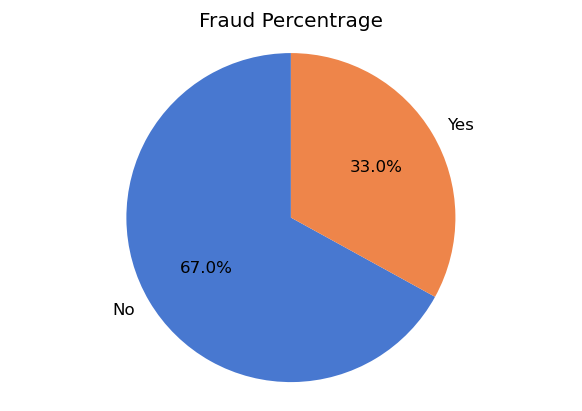

In [125]:
fraud_perc = round(detect_df['FraudDetect'].value_counts()/len(detect_df)*100,0).sort_values(ascending=False)
fig1, ax1 = plt.subplots(dpi=120)
ax1.pie(fraud_perc, labels = fraud_perc.index, autopct='%1.1f%%', radius=2,
        startangle=90, colors = sns.color_palette('muted'))
ax1.axis('equal')
ax1.set_title('Fraud Percentrage')
#plt.savefig('Fraud Percentrage for Test Dataset Pie', bbox_inches='tight');